ابتدا باید کتاب خانه 

nashpy  

را نصب کنیم

In [24]:
!pip install nashpy --default-timeout=1500 future

  Using cached nashpy-0.0.37-py3-none-any.whl (26 kB)
     ---------------------------------------- 2.1/2.1 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4


با  چند دستور ابتدایی این کتابخانه شروع میکنیم و آنها را توضیح میدهیم ...

در این قسمت هر دو جدول بازیکن سطر وستون با یکدیگر برابر هستند

In [28]:
import nashpy as nash
import numpy as np
A = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
rps = nash.Game(A)
print(rps)

Zero sum game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 0  1 -1]
 [-1  0  1]
 [ 1 -1  0]]


اگر ماتریس های دو بازیکن با یکدیگر برابر نباشند به صورت زیر میتوانیم انجام دهیم

In [29]:
B =np.array([[1, 0, 1], [1, 1, -1], [-1, 1, -1]])
rps = nash.Game(A, B)
print(rps)

Bi matrix game with payoff matrices:

Row player:
[[ 0 -1  1]
 [ 1  0 -1]
 [-1  1  0]]

Column player:
[[ 1  0  1]
 [ 1  1 -1]
 [-1  1 -1]]


برای به دست آوردن یوتیلیتی یک استراتژی از جدول به صورت زیر انجام میدهیم

In [30]:
sigma_r = [0, 0, 1]
sigma_c = [0, 1, 0]
print(rps[sigma_r, sigma_c])

[1 1]


حال میخواهیم با استفاده از این کتابخانه نقطه(نقاط) تعادل نش بازی سنگ کاغذ قیجی را که در قسمت اول دیدید را پیدا کنیم.
یک بار با استفاده از

game.support_enumeration 

و بارهای دیگر با استفاده از 

game.vertex_enumeration , Lemke Howson

کد را پیاده سازی کنید. 
و در پایان با جستجو در اینترنت بگویید که تفاوت عملکرد این سه در جیست و خروجی هر سه را با هم مقایسه کنید.
آیا خروجی یا 

pure strategy 


است یا
مصحح محترم در اینجا چکیده ایی از مطالبی که تحقیق کرده ام را برای پاسخ به سوالات قرار داده ام داخل گزارش کار توضیحات بسیار مفصل تر و جامع تر هستند.
 mixed strategy?
 The Vertex enumeration finds every pure strategy but it doesn’t find mixed strategy all the time it is faster then the others and it is usually been used for exploring the complete equilibria space.the lemke-howson doesn’t find all nash equilibria all the time but it does find at least one of them the speed of this algorithm depends on its properties .the supported enumeration finds all the nash equalities wether it is pure or mixed and it is the second fastest of them.


In [34]:
import numpy as np
import nashpy as nash
A=np.array([[0,-1,1],[1,0,-1],[-1,1,0]])
rps=nash.Game(A)
eqs = rps.support_enumeration()
list(eqs)

[(array([0.33333333, 0.33333333, 0.33333333]),
  array([0.33333333, 0.33333333, 0.33333333]))]

In [38]:
import numpy as np
import nashpy as nash
A=np.array([[0,-1,1],[1,0,-1],[-1,1,0]])
rps=nash.Game(A)
eqs2=rps.vertex_enumeration()
list(eqs2)

[(array([0.33333333, 0.33333333, 0.33333333]),
  array([0.33333333, 0.33333333, 0.33333333]))]

In [40]:
import numpy as np
import nashpy as nash
A=np.array([[0,-1,1],[1,0,-1],[-1,1,0]])
rps=nash.Game(A)
eqs3=rps.lemke_howson(initial_dropped_label=0)
list(eqs3)

[array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333])]

همانطور که میبینیم آخرین دو آرایه آخر ایندکس های غیر صحیح دارند که این دو عبارتند از نقاط تعادل میکس شده .
که همان عبارت احتمالی برای انتخاب استراتژی مورد قبول یک فرد را میدهند.

برای چک کردن این که یک استراتژی بهترین جواب است  از کد زیر استفاده میکنیم.

In [ ]:
sigma_r = np.array([0, 1, 0])
sigma_c = np.array([1, 0, 0])
print(rps.is_best_response(sigma_r, sigma_c))

(True, True)



ابتدا درباره مساله 

matching pennies 

تحقیق کنید.
Matching pennies:
Matching pennies is the name for a simple game used in game theory. It is played between two players, Even and Odd. Each player has a penny and must secretly turn the penny to heads or tails. The players then reveal their choices simultaneously. If the pennies match (both heads or both tails), then Even keeps both pennies, so wins one from Odd (+1 for Even, −1 for Odd). If the pennies do not match (one heads and one tails) Odd keeps both pennies, so receives one from Even (−1 for Even, +1 for Odd).
Theory:
Matching Pennies is a zero-sum game because each participant's gain or loss of utility is exactly balanced by the losses or gains of the utility of the other participants. If the participants' total gains are added up and their total losses subtracted, the sum will be zero.
The game can be written in a payoff matrix (pictured right - from Even's point of view). Each cell of the matrix shows the two players' payoffs, with Even's payoffs listed first.
Matching pennies is used primarily to illustrate the concept of mixed strategies and a mixed strategy Nash equilibrium.[1]
This game has no pure strategy Nash equilibrium since there is no pure strategy (heads or tails) that is a best response to a best response. In other words, there is no pair of pure strategies such that neither player would want to switch if told what the other would do. Instead, the unique Nash equilibrium of this game is in mixed strategies: each player chooses heads or tails with equal probability. In this way, each player makes the other indifferent between choosing heads or tails, so neither player has an incentive to try another strategy. The best-response functions for mixed strategies are depicted in Figure 1 below:
 
Figure 1. Best response correspondences for players in the matching pennies game. The leftmost mapping is for the Even player, the middle shows the mapping for the Odd player. The sole Nash equilibrium is shown in the right hand graph. x is a probability of playing heads by Odd player, y is a probability of playing heads by Even. The unique intersection is the only point where the strategy of Even is the best response to the strategy of Odd and vice versa.
When either player plays the equilibrium, everyone's expected payoff is zero.
Variants
	Heads	Tails
Heads	+7, -1	-1, +1
Tails	-1, +1	+1, -1
Matching pennies
Varying the payoffs in the matrix can change the equilibrium point. For example, in the table shown on the right, Even has a chance to win 7 if both he and Odd play Heads. To calculate the equilibrium point in this game, note that a player playing a mixed strategy must be indifferent between his two actions (otherwise he would switch to a pure strategy). This gives us two equations:
•	For the Even player, the expected payoff when playing Heads is   and when playing Tails   (where   is Odd's probability of playing Heads), and these must be equal, so  .
•	For the Odd player, the expected payoff when playing Heads is   and when playing Tails   (where   is Even's probability of playing Heads), and these must be equal, so  .
Note that since   is the Heads-probability of Odd and   is the Heads-probability of Even, the change in Even's payoff affects Odd's equilibrium strategy and not Even's own equilibrium strategy. This may be unintuitive at first. The reasoning is that in equilibrium, the choices must be equally appealing. The +7 possibility for Even is very appealing relative to +1, so to maintain equilibrium, Odd's play must lower the probability of that outcome to compensate and equalize the expected values of the two choices, meaning in equilibrium Odd will play Heads less often and Tails more often.
Lab experiments
Human players do not always play the equilibrium strategy. Laboratory experiments reveal several factors that make players deviate from the equilibrium strategy, especially if matching pennies is played repeatedly:
•	Humans are not good at randomizing. They may try to produce "random" sequences by switching their actions from Heads to Tails and vice versa, but they switch their actions too often (due to a gambler's fallacy). This makes it possible for expert players to predict their next actions with more than 50% chance of success. In this way, a positive expected payoff might be attainable.
•	Humans are trained to detect patterns. They try to detect patterns in the opponent's sequence, even when such patterns do not exist, and adjust their strategy accordingly.
•	Humans' behavior is affected by framing effects.When the Odd player is named "the misleader" and the Even player is named "the guesser", the former focuses on trying to randomize and the latter focuses on trying to detect a pattern, and this increases the chances of success of the guesser. Additionally, the fact that Even wins when there is a match gives him an advantage, since people are better at matching than at mismatching (due to the Stimulus-Response compatibility effect).
Moreover, when the payoff matrix is asymmetric, other factors influence human behavior even when the game is not repeated:
•	Players tend to increase the probability of playing an action which gives them a higher payoff, e.g. in the payoff matrix above, Even will tend to play more Heads. This is intuitively understandable, but it is not a Nash equilibrium: as explained above, the mixing probability of a player should depend only on the other player's payoff, not his own payoff. This deviation can be explained as a quantal response equilibrium. In a quantal-response-equilibrium, the best-response curves are not sharp as in a standard Nash equilibrium. Rather, they change smoothly from the action whose probability is 0 to the action whose probability 1 (in other words, while in a Nash-equilibrium, a player chooses the best response with probability 1 and the worst response with probability 0, in a quantal-response-equilibrium the player chooses the best response with high probability that is smaller than 1 and the worst response with smaller probability that is higher than 0). The equilibrium point is the intersection point of the smoothed curves of the two players, which is different from the Nash-equilibrium point.
•	The own-payoff effects are mitigated by risk aversion. Players tend to underestimate high gains and overestimate high losses; this moves the quantal-response curves and changes the quantal-response-equilibrium point. This apparently contradicts theoretical results regarding the irrelevance of risk-aversion in finitely-repeated zero-sum games. 



اگر بخواهیم چند بار انتخاب استراتژی انجام بگیرد، کدی بنویسید که تکرار عملیات صورت بگیرد
تعداد تکرار را برابر 2 رد نظر بگیرید. 
ماتریس بازی را نمایش دهید.


In [43]:
import nashpy.repeated_games
import nashpy as nash
import nashpy.repeated_games
import numpy as np
A = np.array([[1, -1], [-1, 1]])
matching_pennies = nash.Game(A)
matchPenniesr= nash.repeated_games.obtain_repeated_game(game=matching_pennies, repetitions=2)
print(matchPenniesr)
matchPenniesr.payoff_matrices[0].shape

Zero sum game with payoff matrices:

Row player:
[[ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 [ 2.  2.  2. ...  0. -2. -2.]
 ...
 [ 0.  0.  0. ...  2.  0.  2.]
 [-2. -2. -2. ...  0.  2.  0.]
 [-2. -2. -2. ...  2.  0.  2.]]

Column player:
[[-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 [-2. -2. -2. ...  0.  2.  2.]
 ...
 [ 0.  0.  0. ... -2.  0. -2.]
 [ 2.  2.  2. ...  0. -2.  0.]
 [ 2.  2.  2. ... -2.  0. -2.]]


(32, 32)

حال اگر بخواهیم تعداد تکرار ها را بیشتر کنیم چه؟
برای تکرار های بیشتر این روش محاسبات زیادی میخواهد بجایش از روش های لرنینگ استفاده میکنیم.


در زیر الگوریتم فیکتس

game.fictitious_play

یکی از روش های لرن کردن میباشد.
البته همیشه این الگوریتم همگرا نمیشود 

In [44]:
A = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
B = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])
game = nash.Game(A, B)
iterations = 10000
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]

[array([5464., 1436., 3100.]), array([2111., 4550., 3339.])]

در مساله فوق اعداد آرایه

play_counts 

باید بر تعداد 

iteration 

تقسیم کنید تا احتمال هر استراتژی بدست بیاید و خروجی را نشان دهید.
و در نهایت احتمال هر استراتژی را برای بازیکن اول
row player
را نسبت به  

.iterations

پلاتد کنید
آیا الگوریتمها همگرا میشوند؟ توضیح دهید...
 Fictitious play is a simple learning algorithm for strategic games that proceeds in rounds. In each round, the players play a best response to a mixed strategy that is given by the empirical frequencies of actions played in previous rounds. There is a close relationship between fictitious play and the Nash equilibria of a game: if the empirical frequencies of fictitious play converge to a strategy profile, this strategy profile is a Nash equilibrium. While fictitious play does not converge in general, it is known to do so for certain restricted classes of games, such as constantsum games, non-degenerate 2×n games, and potential games. We study the rate of convergence of fictitious play and show that, in all the classes of games mentioned above, fictitious play may require an exponential number of rounds (in the size of the representation of the game) before some equilibrium action is eventually played. In particular, we show the above statement for symmetric constant-sum win-lose-tie games.
Convergence properties
The process will converge for a 2-person game if: Both players have only a finite number of strategies and the game is zero sum (Robinson 1951) The game is solvable by iterated elimination of strictly dominated strategies 
In fictitious play, strict Nash equilibria are absorbing states. That is, if at any time period all the players play a Nash equilibrium, then they will do so for all subsequent rounds. (Fudenberg and Levine 1998, Proposition 2.1) In addition, if fictitious play converges to any distribution, those probabilities correspond to a Nash equilibrium of the underlying game. (Proposition 2.2)

Generalized Rock Paper Scissors
A	B	C
a	0, 0	2, 1	1, 2
b	1, 2	0, 0	2, 1
c	2, 1	1, 2	0, 0
Therefore, the interesting question is, under what circumstances does fictitious play converge? The process will converge for a 2-person game if:

Both players have only a finite number of strategies and the game is zero sum (Robinson 1951)
The game is solvable by iterated elimination of strictly dominated strategies (Nachbar 1990)
The game is a potential game (Monderer and Shapley 1996-a,1996-b)
The game has generic payoffs and is 2 × N (Berger 2005)
Fictitious play does not always converge, however. Shapley (1964) proved that in the game pictured here (a nonzero-sum version of Rock, Paper, Scissors), if the players start by choosing (a, B), the play will cycle indefinitely.

 
شما صرفا باید به روش گفته شده ptobabilities 
را بصورت مناسب تعریف کنید ...

C:\Users\asus\AppData\Local\Temp\ipykernel_17328\1496508284.py:4: RuntimeWarning: invalid value encountered in divide
  probabilities =[row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


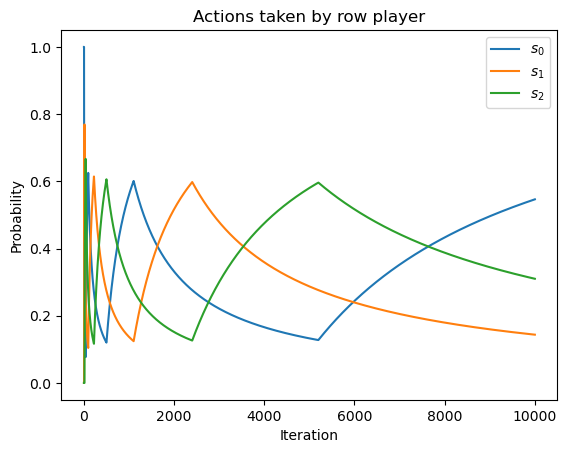

In [45]:
import matplotlib.pyplot as plt
plt.figure() 

probabilities =[row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")  

    
    
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend() 

این بار برای ماتریس های

A , B

همان الگوریتم قبلی را تکرار کنید و نشان دهید که این بار برای بازیکن دوم الگوریتم ها همگرا میشوند

C:\Users\asus\AppData\Local\Temp\ipykernel_17328\1212646816.py:9: RuntimeWarning: invalid value encountered in divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


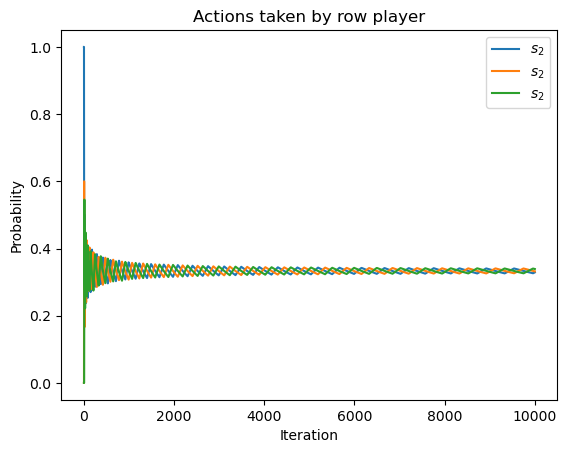

In [46]:
A = np.array([[1 / 2, 1, 0], [0, 1 / 2, 1], [1, 0, 1 / 2]])
B = np.array([[1 / 2, 0, 1], [1, 1 / 2, 0], [0, 1, 1 / 2]])
game = nash.Game(A, B)
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]
import matplotlib.pyplot as plt
plt.figure() 
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
for strategy in zip(*probabilities):
     plt.plot(strategy, label=f"$s_{number}$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend()  

حال میخواهیم ببینیم یک بازیکن در گذر زمان چه احتمالی از استراتژی ها را بازی میکند.
 با استفاده از الگوریتم 

replicator dynamics

برای ماتریس های  هزینه َA,
این کار را انجام دهید.
( البته پیش از این کار همانند قسمت قبل 
احتمال هر استراتژی را برای بازیکن اول و دوم پلات بگیرید)

In [47]:
import nashpy as nash
import numpy as np
A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A,B)
game.replicator_dynamics()

array([[0.5       , 0.5       ],
       [0.49875032, 0.50124968],
       [0.49750377, 0.50249623],
       ...,
       [0.10199196, 0.89800804],
       [0.10189853, 0.89810147],
       [0.10180527, 0.89819473]])

C:\Users\asus\AppData\Local\Temp\ipykernel_17328\1608709746.py:11: RuntimeWarning: invalid value encountered in divide
  probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


array([[0.5       , 0.5       ],
       [0.49875032, 0.50124968],
       [0.49750377, 0.50249623],
       ...,
       [0.10199196, 0.89800804],
       [0.10189853, 0.89810147],
       [0.10180527, 0.89819473]])

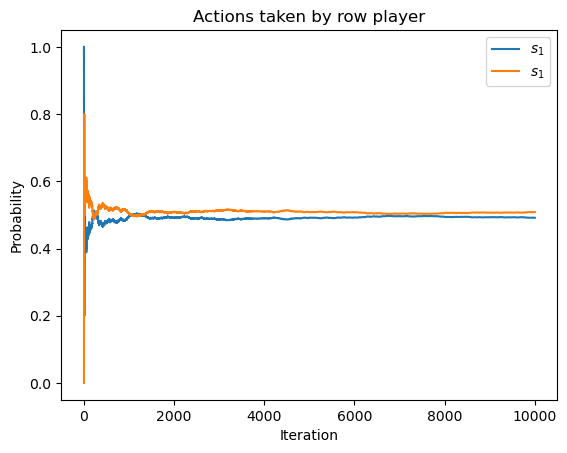

In [51]:
import nashpy as nash
import numpy as np
A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A,B)
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]
import matplotlib.pyplot as plt
plt.figure() 
probabilities = [row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]
for strategy in zip(*probabilities):
     plt.plot(strategy, label=f"$s_{number}$")  
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend()  
game.replicator_dynamics()

C:\Users\asus\AppData\Local\Temp\ipykernel_17328\2753322717.py:12: RuntimeWarning: invalid value encountered in divide
  probabilities =[row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]


array([[0.5       , 0.5       ],
       [0.49875032, 0.50124968],
       [0.49750377, 0.50249623],
       ...,
       [0.10199196, 0.89800804],
       [0.10189853, 0.89810147],
       [0.10180527, 0.89819473]])

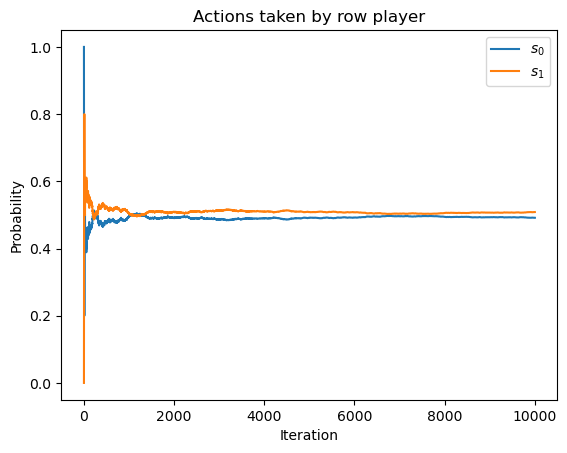

In [52]:
import nashpy as nash
import numpy as np
A = np.array([[3, 2], [4, 2]])
B = np.array([[1, 3], [2, 4]])
game = nash.Game(A, B)
np.random.seed(0)
play_counts = tuple(game.fictitious_play(iterations=iterations))
play_counts[-1]
import matplotlib.pyplot as plt
plt.figure() 

probabilities =[row_play_counts / np.sum(row_play_counts) for row_play_counts, col_play_counts in play_counts]

for number, strategy in enumerate(zip(*probabilities)):
    plt.plot(strategy, label=f"$s_{number}$")   
plt.xlabel("Iteration")  
plt.ylabel("Probability")  
plt.title("Actions taken by row player")  
plt.legend() 
game.replicator_dynamics()